### Machine Learning using MNIST Dataset
1. Dataset: https://www.kaggle.com/c/digit-recognizer/data
2. Problem statement: Handwritten digit recognization (0-9)
3. Type of problem: Classification, Supervised
4. Data type: Images stored in csv file
5. Performance Measures: Accuracy, Precision, Recall, Confusion Matrix
6. Feature Importance: Not required
7. Interpretability: We can provide nearest neighbors of the query image to justify why image is classified as 'this'

### Classification Algorithms:
1. K-Nearest Neighbor
2. Logistic Regression (one-vs-rest)
3. SVM Classifier
4. Decision Tree
5. Random Forest
6. XGBoost

### Other Libraries:
1. GridsearchCV for hyperparameter tuning
2. randomsearchCV for hyperparameter tuning
3. Reference Link: https://stackoverflow.com/questions/57426633/what-is-randomsearchcv-and-gridsearchcv

### Data Visualization
1. Principal Component Analysis
2. t-SNE
- Reference Link: https://www.datacamp.com/community/tutorials/introduction-t-sne

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import random

from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from random import randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from pactools.grid_search import GridSearchCVProgressBar

from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


### Read data from two files train.csv and test.csv
1. train.csv file contains images (28 x 28) representaed as rows (784 dimensional) and a label as digit
2. train.csv file contains images (28 x 28) representaed as rows (784 dimensional)
3. sample_submission.csv is the file which contains test image number and corresponding predicted digit 
   Soultion is submitted in sample_submission.csv file

In [2]:
mnist_train = pd.read_csv(r"C:\Users\prash\OneDrive\Documents\dataset\mnist\train.csv")
mnist_test  = pd.read_csv(r"C:\Users\prash\OneDrive\Documents\dataset\mnist\test.csv")

In [3]:
mnist_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist_train.tail(30)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41970,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41971,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41972,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41973,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41974,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41975,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41976,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41977,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41978,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41979,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


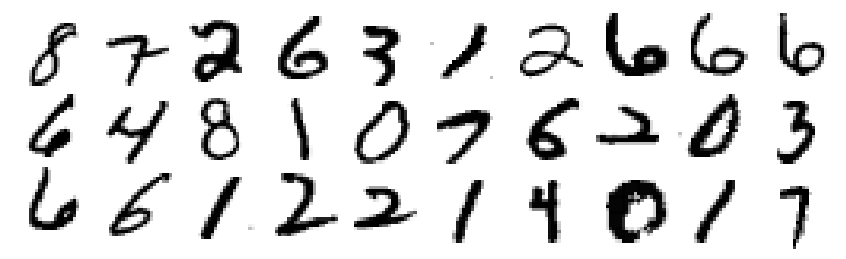

In [5]:
# VISUALIZE DATA
samples = mnist_train.iloc[5000:5030,1:].values
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(samples[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [6]:
mnist_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print(mnist_train.shape, mnist_test.shape)

(42000, 785) (28000, 784)


### Check whether data is balanced or imbalanced

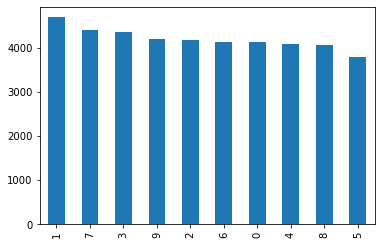

In [8]:
data_check = mnist_train['label'].value_counts().plot(kind='bar')
plt.show()

From above figure one can conclude that dataset is balanced

### Principal Component Analysis for data visualization
we convert 784 dimensional data into 2 dimensional to visualize the data in 2D

In [9]:
X_raw = mnist_train.drop(['label'], axis = 1, inplace = False)
y = mnist_train['label']

In [10]:
arr = X_raw.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(arr)
X = pd.DataFrame(x_scaled)

In [11]:
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X)
principal_DF = pd.DataFrame(data = principal_components, columns = ['component1', 'component2'])
final_DF = pd.concat( [principal_DF, mnist_train[['label']]], axis = 1)

['#10AEFD', '#DB9758', '#F71252', '#07981E', '#6985B5', '#ECD75A', '#FB8B34', '#8E1730', '#52099B', '#119D58']


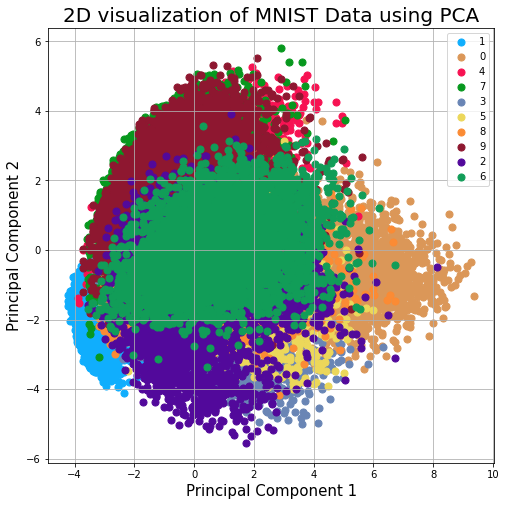

In [12]:
fig = plt.figure(figsize = (8,8))
ax = plt.subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D visualization of MNIST Data using PCA', fontsize = 20)

targets = list(mnist_train['label'].unique())
random.seed(10)
colors = []
for i in range(10):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
print(colors)
for target, color in zip(targets,colors):
    indicesToKeep = final_DF['label'] == target
    ax.scatter(final_DF.loc[indicesToKeep, 'component1'], final_DF.loc[indicesToKeep,'component2'], c = color, s=50)
ax.legend(targets)
ax.grid()


#### From above figure it is obvious conclusion is that data is not seperable. However this is not the case as PCA has some drawbacks. 
#### Next technique we try is t-SNE

In [13]:

tsneData = TSNE(random_state=10).fit_transform(X)

In [14]:
def ScatterPlotTsne(X,y):
    num_digits= len(np.unique(y))
    palette = np.array(sns.color_palette("hls", num_digits))
    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=palette[y.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    
    txts = []
    for i in range(num_digits):
        xtext, ytext = np.median(X[y == i, :], axis = 0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            path_effects.Stroke(linewidth=5, foreground="w"),
            path_effects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(-32.08838, 37.700127, '0'),
  Text(-2.247375, -47.61816, '1'),
  Text(-40.950054, -20.687288, '2'),
  Text(-29.285925, 7.416335, '3'),
  Text(51.650467, -0.7644783, '4'),
  Text(7.1359134, 21.355223, '5'),
  Text(7.62326, 47.0719, '6'),
  Text(15.149429, -18.88103, '7'),
  Text(-8.401675, -9.114696, '8'),
  Text(34.0138, -7.488697, '9')])

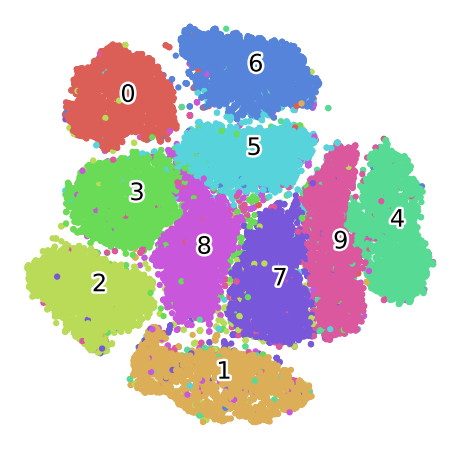

In [15]:
ScatterPlotTsne(tsneData,y)

#### From above figure we can say data is seperable as seperate clusters are formed for each digit

### Divide data into 3 parts
1. Train - To calculate nearest neighbors
2. cross-validation: To find optimal value of k (Hyperparameter)
3. Test: To test final accuracy of the model

In [16]:
X_1, X_test, y_1, y_test = train_test_split(X,y,test_size = 0.25, random_state = 10)
X_train, X_cv, y_train, y_cv = train_test_split(X_1,y_1,test_size = 0.20, random_state = 10)
print(X_train.shape, X_test.shape, X_cv. shape, y_train.shape, y_test.shape, y_cv.shape)

(25200, 784) (10500, 784) (6300, 784) (25200,) (10500,) (6300,)


## KNN Classifier

In [17]:
def trainKNN(X_train, y_train, k): 
    classifier = KNeighborsClassifier(n_neighbors=k, n_jobs = -1)
    classifier.fit(X_train,y_train)
    return classifier

In [18]:
def predictClassifier(X_test, classifier):#Function to predict labels using classifier&Takes argumenst as test/cv dataset, and returns predicted values by model
    y_pred = classifier.predict(X_test)
    return y_pred

In [19]:
def calculateAccuracy(y_pred, y_test):#Function to check accuracy of the model. Takes input arguments as actual and predicted valuesand returns accuracy score
    accuracy = accuracy_score(y_pred, y_test)
    return accuracy

In [20]:

kvalues = [x for x in range(1,50, 6)]
AccuracyList = []
for k in tqdm(kvalues):
    knnClassifier = trainKNN(X_train, y_train, k)
    y_pred = predictClassifier(X_cv, knnClassifier)
    acc = calculateAccuracy(y_pred, y_cv)
    AccuracyList.append(acc)     

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [02:14<00:00, 14.98s/it]


In [21]:
AccuracyList

[0.9633333333333334,
 0.9652380952380952,
 0.9611111111111111,
 0.9568253968253968,
 0.9552380952380952,
 0.9517460317460318,
 0.9480952380952381,
 0.9457142857142857,
 0.9442857142857143]

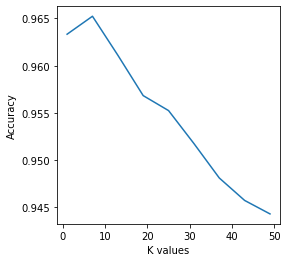

In [22]:
f = plt.figure(figsize = (4,4))
ax = plt.subplot()
plt.plot(kvalues,AccuracyList)
ax.set_xlabel('K values', fontsize = 10)
ax.set_ylabel('Accuracy', fontsize = 10)
plt.show()

In [23]:
%%time
# Wall time: 3min 49s
clf = trainKNN(X_train,y_train, 7)
y_pred = predictClassifier(X_test, knnClassifier)
acc = calculateAccuracy(y_pred, y_test)
print("Final Accuracy: ",acc)

Final Accuracy:  0.9407619047619048
Wall time: 26.2 s


################# Confusion Matrix ####################


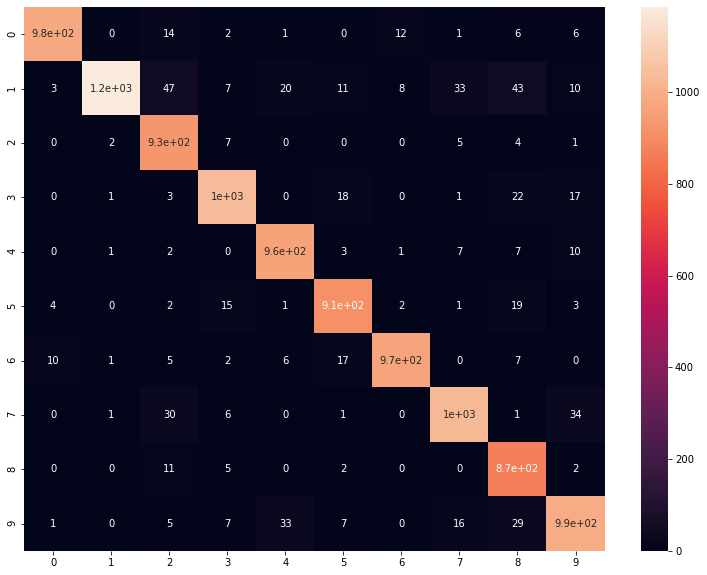

In [24]:
num_digits= np.unique(y)
cf = confusion_matrix(y_pred,y_test, labels = num_digits )
print("################# Confusion Matrix ####################")
fig = plt.figure(figsize = (13,10))
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); #annot=True to annotate cells


## Decision Tree

In [25]:

maxDepth = [4,6,8,10,12,15,20,30,50,80, 120]
trainAcc = []
CVAcc = []
for depth in tqdm(maxDepth):
    clfDT = DecisionTreeClassifier(criterion='gini',max_depth = depth)
    clfDT.fit(X_train, y_train)
    y_predDTtrain = clfDT.predict(X_train)
    y_predDTcv = clfDT.predict(X_cv)
    accTr = accuracy_score(y_train, y_predDTtrain)
    accCv = accuracy_score(y_cv, y_predDTcv)
    trainAcc.append(accTr)
    CVAcc.append(accCv)    

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:53<00:00,  4.86s/it]


In [26]:
print(trainAcc)
print(CVAcc)

[0.6329761904761905, 0.7385714285714285, 0.8384920634920635, 0.9097222222222222, 0.955595238095238, 0.9851190476190477, 0.9958730158730159, 0.9993253968253968, 1.0, 1.0, 1.0]
[0.6395238095238095, 0.7396825396825397, 0.8138095238095238, 0.844920634920635, 0.8498412698412698, 0.8553968253968254, 0.849047619047619, 0.847936507936508, 0.8485714285714285, 0.8501587301587301, 0.8507936507936508]


In [27]:
def plotCVandTrainAccuracyAndError(CVAcc,trainAcc,maxDepth):
    fig = plt.figure(figsize = (10,5))
    ax = plt.subplot(1,2,1)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Accuracy', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    
    plt.plot(maxDepth,CVAcc,label='CV Accuracy')
    plt.plot(maxDepth,trainAcc,label='train Accuracy')
    ax.legend()
    
    trainError = [1-x for x in trainAcc]
    CVError    = [1-x for x in CVAcc]
    ax = plt.subplot(1,2,2)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Error', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    
    plt.plot(maxDepth,CVError,label='CV Error')
    plt.plot(maxDepth,trainError,label='train Error')
    ax.legend()

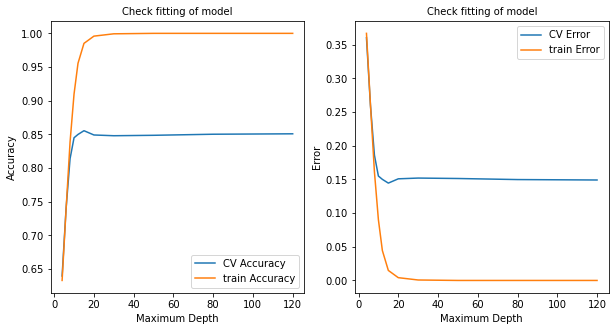

In [28]:
plotCVandTrainAccuracyAndError(CVAcc,trainAcc,maxDepth)

In [29]:
clfDT = DecisionTreeClassifier(criterion='gini',max_depth = 15)
clfDT.fit(X_train, y_train)
y_pred = clfDT.predict(X_test)

print("Final Accuracy DT: ",accuracy_score(y_test,y_pred))

Final Accuracy DT:  0.8488571428571429


## Logistic Regression

In [30]:
# applying logistic regression 


lgr = LogisticRegression(max_iter=900)
lgr.fit(X_train,y_train)
y_pred = lgr.predict(X_test)

print("Final Accuracy of Logistic Regression : ",accuracy_score(y_test,y_pred))

Final Accuracy of Logistic Regression :  0.9151428571428571


## SVM

In [31]:
# Applying SVM

classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Final Accuracy of SVM : ",accuracy_score(y_test,y_pred))

Final Accuracy of SVM :  0.9285714285714286


## Random forest algorithm 

In [32]:
from sklearn.ensemble import RandomForestClassifier
rdf =  RandomForestClassifier()
rdf.fit(X_train,y_train)
y_pred = rdf.predict(X_test)

print("Final Accuracy RF: ",accuracy_score(y_test,y_pred))


Final Accuracy RF:  0.960952380952381


## XGBoost algorithm

In [33]:
#from xgboost import XGBClassifier
import xgboost as xgb 
my_model = xgb.XGBClassifier() 
my_model.fit(X_train, y_train)
y_pred = my_model.predict(X_test)

print("Final Accuracy of xgboost : ",accuracy_score(y_test,y_pred))

C:\Users\prash\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:36:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Final Accuracy of xgboost :  0.9723809523809523
